# TFC - 2º entrega intercalar

In [98]:
#All imports used
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("seaborn:", sns.__version__)

pandas: 2.1.4
numpy: 1.26.3
seaborn: 0.13.1


In [99]:
# limpeza de dados e produçao dataframe
dict = {}
study_groups = {'Music', 'Book', 'DVD'}
dfs = []
dfs_cats = []
dfs_similars = []

def read_archive():
    #archives = "teste.txt"
    archives = "amazon-meta.txt"

    file = open(archives, "r", encoding="UTF-8")
    lines = file.readlines()
    asin = None
    similarities = []
    group = None
    title = None 
    customer_ids = []
    cats_list = []
    most_frequent_categories = ""


    for line in lines:
        study_line = line.strip()
        #obter o grupo
        if study_line.startswith("group: "):
            group = study_line.split(":")[1].strip()

        #obter id do produto
        if study_line.startswith("ASIN: "):
            asin = study_line.split(":")[1].strip() 
            similarities = []

        #obter titulo do produto
        if study_line.strip().startswith("title"):
            current_title = line.split(":", 1)[1].strip()
            # Append the title to the array
            title = current_title 

        #obter lista de produtos semelhantes
        if study_line.startswith("similar: ") and (group in study_groups):
            similarities = study_line.split()[2:]

        #obter categorias - 1º retiramos o espaço, 2º retiramos o '|', 3º retiramos os numero identificador da categoria
        if study_line.strip().startswith("|") and (group in study_groups):
            try:
                #obtermos a categoria na posiçao 3 (colocamos 3 no array porque contamos com o espaço)
                category = study_line.strip().split('|')[3] 
                category = category.split("[")[0]
            except:
                category = ""

            cats_list.append(category)

        #obter user id e rating de utilizadores que efetuaram avaliaçoes ao produto
        if study_line.strip() and study_line[0].isdigit() and (group in study_groups):
            parts = line.split()
            user_id = parts[2]
            rating = parts[4]
            customer_ids.append(f"{user_id} - {rating}")

        #quando chegamos ao fim da  informaçao de um dado produto, vamos agregar toda a informaçao ena lista-> organized_lines
        if not study_line and (group in study_groups):
            #começamos por verificar qual a catefgoria que é mais frequente
            categories_count = Counter(cats_list)
            if categories_count:
              most_frequent_categories = categories_count.most_common(1)[0][0]
            else:
              most_frequent_categories = ""

         
            if not similarities:
                similarities = None

            if not most_frequent_categories:
                most_frequent_categories = None

            data_dict = {
                'id': asin,
                'group': group.strip("[]").replace("'", ""),
                'title': title,
                'similarities': similarities,
                'categories': most_frequent_categories,
                'reviews': customer_ids
            }
            dfs.append(data_dict)
            
            customer_ids = []
            title = None
            categories = []
            cats_list = []
            group = None

    file.close()


read_archive()
full_dataSet_dataframe = pd.DataFrame(dfs)

## Data Processing
-- Phase to of treatment of data --


In [100]:
#Delete products that do not have a similarity or category associated
full_dataSet_dataframe = full_dataSet_dataframe.dropna(subset=['similarities'])
full_dataSet_dataframe = full_dataSet_dataframe.dropna(subset=['categories'])
full_dataSet_dataframe

,id,group,title,similarities,categories,reviews
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,"[0804215715, 156101074X, 0687023955, 068707423...",Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
1,0738700797,Book,Candlemas: Feast of Flames,"[0738700827, 1567184960, 1567182836, 073870052...",Religion & Spirituality,"[A11NCO6YTE4BTJ - 5, A9CQ3PLRNIR83 - 4, A13SG9..."
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,"[0842328130, 0830818138, 0842330313, 084232861...",Religion & Spirituality,[A2591BUPXCS705 - 4]
4,1577943082,Book,Prayers That Avail Much for Business: Executive,"[157794349X, 0892749504, 1577941829, 089274956...",Religion & Spirituality,[]
5,0486220125,Book,How the Other Half Lives: Studies Among the Te...,"[0486401960, 0452283612, 0486229076, 071484034...",History,"[ATVPDKIKX0DER - 5, AUEZ7NVOEHYRY - 5, ATVPDKI..."
...,...,...,...,...,...,...
516528,B000059TOC,DVD,The Drifter,"[630366704X, B0002ERXB8, B0001932ZU, B0001VTPU...",Special Features,[A32PCPZL40G5N8 - 5]
516529,B00006JBIX,DVD,The House Of Morecock,"[B0002HOE6C, B0002I84JO, B00004WZQN, B00069CQ8...",Genres,"[A24IFZUH8NLISK - 1, A2SVXZKU40G7N - 5, A3HM5G..."
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,"[1931709920, 188187110X, 081890643X, 158051046...",Nonfiction,[A2PD80S1N7920J - 4]
516531,B00008DDST,DVD,"1, 2, 3 Soleils: Taha, Khaled, Faudel","[B00012FWNC, B0002UNQQI, B00069FKLO, B0000CNTH...",Genres,"[A3NKS7CVEJVTQ6 - 5, A3EQ4YAZ5OEVK9 - 5, A3HRK..."


<Axes: ylabel='group'>

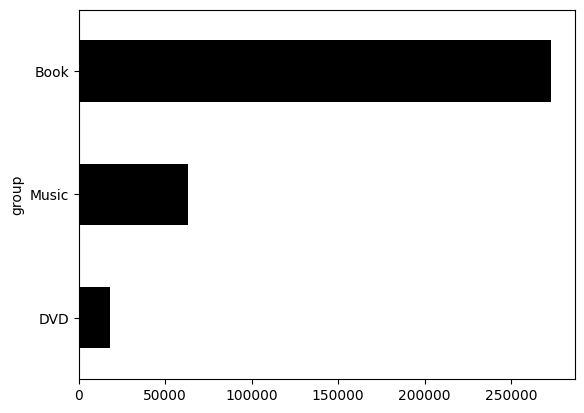

In [101]:
#This graph shows the relationship between the type of product and the quantity in the dataset
full_dataSet_dataframe.groupby('group').size().sort_values().plot(kind='barh', color='black')

In [102]:
#Count products per category
count_categories = full_dataSet_dataframe['categories'].value_counts()
count_categories

categories
Children's Books           30497
Nonfiction                 23671
Religion & Spirituality    23551
Literature & Fiction       21891
Health, Mind & Body        16708
                           ...  
Stephen E. Ambrose             4
Camera & Photo                 3
HOWdesign Studio               1
Camera & Photo Brands          1
Video & Music                  1
Name: count, Length: 93, dtype: int64

In [103]:
#When we look at the 10 categories with the most products, we notice that they are all books
#As the result would include Genres as one of the T
filtered_data = full_dataSet_dataframe[full_dataSet_dataframe['categories'] != 'Genres']

top_10_categories = filtered_data['categories'].value_counts().head(10)
top_10_categories

categories
Children's Books           30497
Nonfiction                 23671
Religion & Spirituality    23551
Literature & Fiction       21891
Health, Mind & Body        16708
Business & Investing       14745
Home & Garden              10995
History                    10481
Computers & Internet       10441
Entertainment               9078
Name: count, dtype: int64

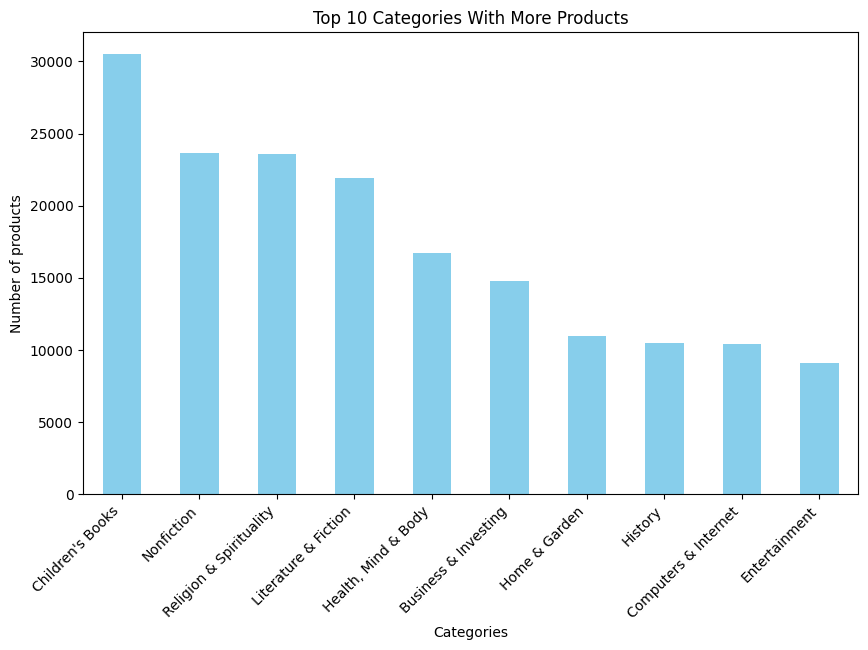

In [104]:
#Creates the bar chart for the 10 most frequent categories 
top_10_categories.plot(kind='bar', figsize=(10, 6),color='skyblue')

plt.title('Top 10 Categories With More Products')
plt.xlabel('Categories')
plt.ylabel('Number of products')

plt.xticks(rotation=45, ha='right')

plt.show()

In [105]:
#Let's see how many categories we have at first -> result 61
initial_categories = full_dataSet_dataframe[full_dataSet_dataframe['group'] == 'Book']
initial_categories['categories'].value_counts()

categories
Children's Books           30496
Nonfiction                 23670
Religion & Spirituality    23551
Literature & Fiction       21887
Health, Mind & Body        16707
                           ...  
Pop                            1
Miscellaneous                  1
Opera & Vocal                  1
HOWdesign Studio               1
Actors & Actresses             1
Name: count, Length: 61, dtype: int64

In [106]:
#Remove the categories that are not from books because they are not relevant to the study
unwanted_categories = ['jp-unknown1', 'jp-unknown2', 'jp-unknown3', 'Genres', 'Reference', 'Books on Tape','Book Clubs','Bargain Books','Books on CD',"O'Reilly",
                       'New & Used Textbooks','Home & Office','Boxed Sets','McGraw-Hill','Sheet Music & Scores','Book Accessories','Holiday Greeting Cards','Accessories',
                       'Books, Music & More','Gift Categories','Classical','Camera & Photo','Calendars', 'Libros en español','Foreign Language Books', 'Parenting & Families','Engineering'
                       'Large Print', 'Stephen E. Ambrose', 'Miscellaneous', 'HOWdesign Studio','John Wiley & Sons', 'Opera & Vocal', 'Large Print', 'Pop', 'Gay & Lesbian', 'Camera & Photo Brands', 'Actors & Actresses'] 
book = full_dataSet_dataframe[full_dataSet_dataframe['group'] == 'Book']
book = book[~book['categories'].isin(unwanted_categories)]

book

,id,group,title,similarities,categories,reviews
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,"[0804215715, 156101074X, 0687023955, 068707423...",Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
1,0738700797,Book,Candlemas: Feast of Flames,"[0738700827, 1567184960, 1567182836, 073870052...",Religion & Spirituality,"[A11NCO6YTE4BTJ - 5, A9CQ3PLRNIR83 - 4, A13SG9..."
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,"[0842328130, 0830818138, 0842330313, 084232861...",Religion & Spirituality,[A2591BUPXCS705 - 4]
4,1577943082,Book,Prayers That Avail Much for Business: Executive,"[157794349X, 0892749504, 1577941829, 089274956...",Religion & Spirituality,[]
5,0486220125,Book,How the Other Half Lives: Studies Among the Te...,"[0486401960, 0452283612, 0486229076, 071484034...",History,"[ATVPDKIKX0DER - 5, AUEZ7NVOEHYRY - 5, ATVPDKI..."
...,...,...,...,...,...,...
516511,0006176909,Book,House of Cards,"[0006471641, 0006477097, B00009MGGI, 000649799...",Mystery & Thrillers,"[A1MMBWP20WQ2N3 - 5, A3R803J7QXVUI1 - 3, A2FOS..."
516512,0786632550,Book,Mel Bay's Complete Traditional Holiday Season ...,"[079357000X, 0793529395, 0793585031, 0634002066]",Entertainment,"[AR0807T2MTJBL - 4, A2CC70LC14MNT7 - 5, A29TSN..."
516514,4770023286,Book,Sengai: Master Zen Painter,"[4770029446, 1570624895]",Arts & Photography,[AOV39AQYLNIRG - 4]
516521,0060537612,Book,If You Take a Mouse Five-Book Set (If You Take...,"[0689808747, 0689820305, 0859531821, 006026686...",Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV..."


In [107]:
# Qunatity of categories after removing those that are not relevant -> result = 28
book_categories = book['categories'].value_counts()

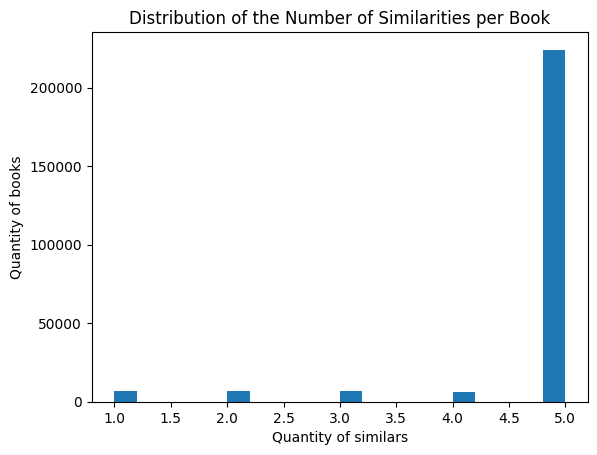

In [108]:
#In the original dataframe we have a maximum of 5 similar books per product, but that doesn't tell us much about the quantity of similars that one product actually has in the whole dataset
book['similarity_count'] = book['similarities'].apply(len)

book['similarity_count'].plot(kind='hist', bins=20) 

plt.title('Distribution of the Number of Similarities per Book')
plt.xlabel('Quantity of similars')
plt.ylabel('Quantity of books')
plt.show()

In [109]:
#Explode of the dataframe will allow us to know which and how many similar books each book has
#Analysis of this data led to the recognition that not all similar products are products that exist in the dataset itself
book_exploded = book.explode('similarities')
book_exploded

,id,group,title,similarities,categories,reviews,similarity_count
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0804215715,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,156101074X,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0687023955,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0687074231,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,082721619X,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
...,...,...,...,...,...,...,...
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,1931709920,Nonfiction,[A2PD80S1N7920J - 4],5
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,188187110X,Nonfiction,[A2PD80S1N7920J - 4],5
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,081890643X,Nonfiction,[A2PD80S1N7920J - 4],5
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,1580510469,Nonfiction,[A2PD80S1N7920J - 4],5


In [110]:
#Filtering: Let's see the Ids of the similarities that are not in the id column and remove them
book_exploded = book_exploded[book_exploded['similarities'].isin(book['id'])]
book_exploded

,id,group,title,similarities,categories,reviews,similarity_count
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0804215715,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,156101074X,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0687023955,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0687074231,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,082721619X,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
...,...,...,...,...,...,...,...
516521,0060537612,Book,If You Take a Mouse Five-Book Set (If You Take...,0859531821,Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV...",5
516521,0060537612,Book,If You Take a Mouse Five-Book Set (If You Take...,0060266864,Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV...",5
516521,0060537612,Book,If You Take a Mouse Five-Book Set (If You Take...,0916291820,Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV...",5
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,1580510469,Nonfiction,[A2PD80S1N7920J - 4],5


In [111]:
#To know how often one product appears as similar to another in the dataset
count_ids_by_similarities = book_exploded[['id','similarities']].groupby('similarities',as_index=False).count()
count_ids_by_similarities

,similarities,id
0,0001472933,2
1,0001955071,1
2,0002154129,10
3,0002154463,6
4,0002159317,3
...,...,...
152488,9997053060,2
152489,9999366651,2
152490,B00008JYQ3,6
152491,B00008NRHJ,5


In [112]:
#To know how often one product appears as similar to another in the dataset
count_ids_by_similarities_x = book_exploded[['id','similarities']].groupby('id',as_index=False).count()
count_ids_by_similarities_x.similarities.quantile(0.9)

5.0

In [113]:
# Of the values obtained by counting the quantity of similars we can observe the median, maximum and minimum values
median = count_ids_by_similarities['id'].median()
maximum = count_ids_by_similarities['id'].max()
minimum = count_ids_by_similarities['id'].min()
print(median, maximum, minimum)

3.0 295 1


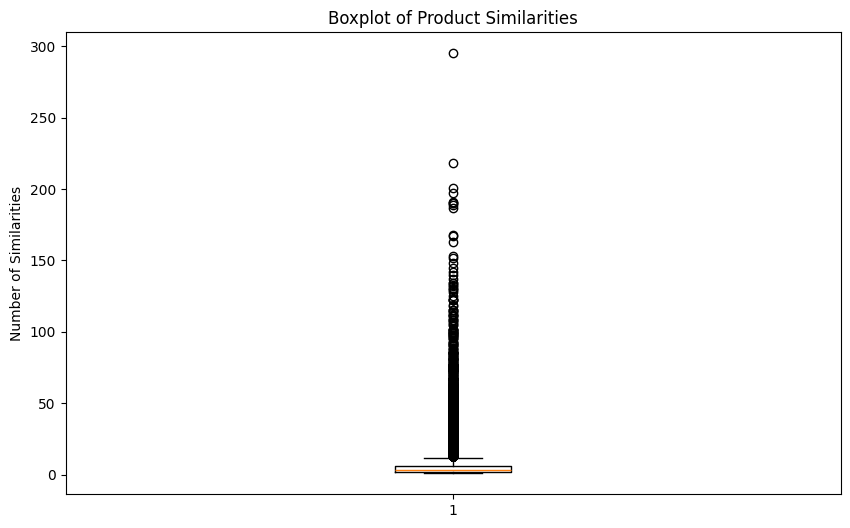

In [114]:
# Boxplot that represents count_ids_by_similarities
plt.figure(figsize=(10, 6))
plt.boxplot(count_ids_by_similarities['id'])
plt.title('Boxplot of Product Similarities')
plt.ylabel('Number of Similarities')
plt.show()


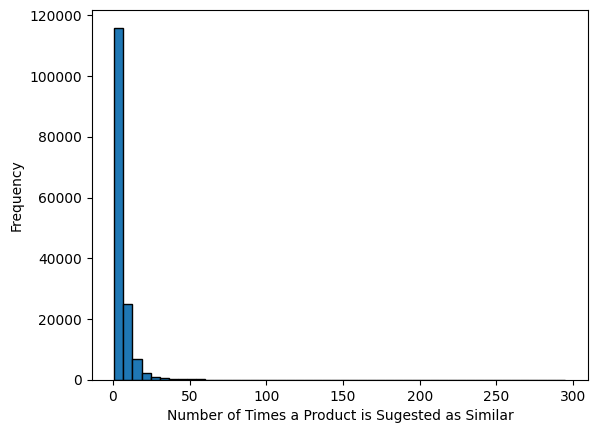

In [115]:
#Histogram that represents 
plt.hist(count_ids_by_similarities['id'], bins=50, edgecolor='black') 
plt.xlabel('Number of Times a Product is Sugested as Similar')
plt.ylabel('Frequency')

plt.show()

In [116]:
#In order to know the best cut-off point for analyzing the data that gives us information on the relations between the percentage of products and the number of products recommended
#10% of the values are less than or equal to 1.0.
count_ids_by_similarities['id'].quantile([0.01,0.05,0.1,0.5,0.6,0.75,0.9])

0.01     1.0
0.05     1.0
0.10     1.0
0.50     3.0
0.60     4.0
0.75     6.0
0.90    11.0
Name: id, dtype: float64

## Network Category-Category
--- Process to create network category-category ---
It should be noted that during this analysis we refer to book category and book genre as the same

In [117]:
#Let's look at the relationship between the Id and the product genre. We group products by category.
study_categories = book[['categories','id']].groupby('categories')
study_categories

In [118]:
#Let's start looking in more detail at category-category and product-product relationships
merged_dataframe = pd.merge(book_exploded[['id','categories','similarities']], book[['id','categories']], left_on='similarities', right_on='id', how='left')
merged_dataframe

,id_x,categories_x,similarities,id_y,categories_y
0,0827229534,Religion & Spirituality,0804215715,0804215715,Religion & Spirituality
1,0827229534,Religion & Spirituality,156101074X,156101074X,Religion & Spirituality
2,0827229534,Religion & Spirituality,0687023955,0687023955,Religion & Spirituality
3,0827229534,Religion & Spirituality,0687074231,0687074231,Religion & Spirituality
4,0827229534,Religion & Spirituality,082721619X,082721619X,Religion & Spirituality
...,...,...,...,...,...
787569,0060537612,Children's Books,0859531821,0859531821,Children's Books
787570,0060537612,Children's Books,0060266864,0060266864,Children's Books
787571,0060537612,Children's Books,0916291820,0916291820,Children's Books
787572,0879736836,Nonfiction,1580510469,1580510469,Religion & Spirituality


In [119]:
#The columns show the related genres
merged_dataframe[['categories_x', 'categories_y']]

,categories_x,categories_y
0,Religion & Spirituality,Religion & Spirituality
1,Religion & Spirituality,Religion & Spirituality
2,Religion & Spirituality,Religion & Spirituality
3,Religion & Spirituality,Religion & Spirituality
4,Religion & Spirituality,Religion & Spirituality
...,...,...
787569,Children's Books,Children's Books
787570,Children's Books,Children's Books
787571,Children's Books,Children's Books
787572,Nonfiction,Religion & Spirituality


In [120]:
#categories_relation represents all existing relations between genres
categories_relation = merged_dataframe[['categories_x', 'categories_y']].groupby(['categories_x', 'categories_y']).size().reset_index(name='count')
categories_relation

,categories_x,categories_y,count
0,Arts & Photography,Arts & Photography,18759
1,Arts & Photography,Biographies & Memoirs,473
2,Arts & Photography,Business & Investing,276
3,Arts & Photography,Children's Books,650
4,Arts & Photography,Comics & Graphic Novels,114
...,...,...,...
660,Travel,Science,249
661,Travel,Science Fiction & Fantasy,1
662,Travel,Sports,504
663,Travel,Teens,2


In [121]:
#Books of the same genre are bought 3.1 times more often than books of different genres
same_genre = merged_dataframe[merged_dataframe['categories_x'] == merged_dataframe['categories_y']]

different_genre = merged_dataframe[merged_dataframe['categories_x'] != merged_dataframe['categories_y']]

# Calculating the average
total_rows = len(merged_dataframe)
same_genre_count = len(same_genre)
different_genre_count = len(different_genre)

# Percentages
same_genre_mean = same_genre_count / total_rows * 100
different_genre_mean = different_genre_count / total_rows * 100

relative_frequency = same_genre_mean / different_genre_mean if different_genre_mean != 0 else float('inf')

relative_frequency, same_genre_mean, different_genre_mean

(3.101841097888076, 75.62070357833042, 24.379296421669583)

---- Network Category-Category is created! Named categories_relation ----

In [122]:
#categoriess_relation representa todas as relações existentes entre generos
#a este ponto cats_relation ainda temos o erro de A->B como B->A 
categories_relation.to_csv('categories_relation.csv')


### Q1 - How often do you buy books in one genre compared to books in different genres?

#### Network Category-Category: Same Genres


In [123]:
# categories_relation is not filtered 
# consider only those that are equal - see the quantity - see the quantity of equal generos and compare with the result below that only has different ones
file_path = 'categories_relation.csv'
study_categories = pd.read_csv(file_path)
study_categories.drop(study_categories.columns[0], axis=1, inplace=True)
study_categories.columns = ['Source', 'Target', 'Weight']
study_categories

,Source,Target,Weight
0,Arts & Photography,Arts & Photography,18759
1,Arts & Photography,Biographies & Memoirs,473
2,Arts & Photography,Business & Investing,276
3,Arts & Photography,Children's Books,650
4,Arts & Photography,Comics & Graphic Novels,114
...,...,...,...
660,Travel,Science,249
661,Travel,Science Fiction & Fantasy,1
662,Travel,Sports,504
663,Travel,Teens,2


In [124]:
#We analyse information on the weight of products
max_weight = study_categories['Weight'].max()  # Maximum value
min_weight = study_categories['Weight'].min()  # Minimum value
average_weight = study_categories['Weight'].mean()  # Average value

print(max_weight)
print(min_weight)
print(average_weight)

99954
1
1184.3218045112783


<Axes: >

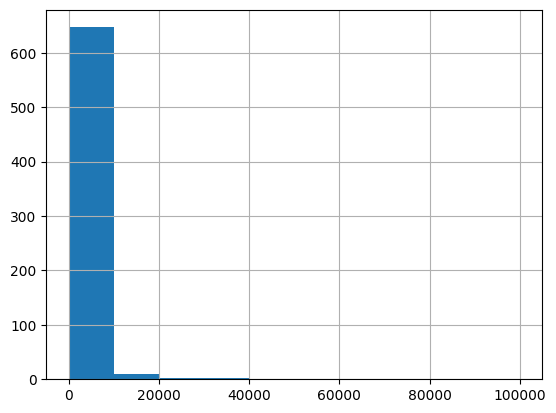

In [125]:
#We note that a large part of the existing relationships, a number that reaches almost 700, have a weight (existing products as a whole) close to 10 thousand.
study_categories['Weight'].hist()

#### Network Category-Category: different genres
---- from here we will filter the dataframe of the categories and obtain information pertinent to the study ----

In [126]:
# From the result shown in the graph above, we can see that: cats_relation has relations between equal genes. 
# Given this occurrence, we decided to analyze the values of relations between equal and different types in order to see the impact of these relations on the original cats relation network!
categories_unfiltered = study_categories[study_categories['Source'] == study_categories['Target']]
categories_unfiltered.to_csv('SourceTargetEqual_csv_file.csv', index=False)

In [127]:
# We can thus observe the weight of the relationships between the same literary genres
file_path = 'SourceTargetEqual_csv_file.csv'
unfiltered_categories = pd.read_csv(file_path)
unfiltered_categories 

,Source,Target,Weight
0,Arts & Photography,Arts & Photography,18759
1,Biographies & Memoirs,Biographies & Memoirs,9216
2,Business & Investing,Business & Investing,35711
3,Children's Books,Children's Books,99954
4,Comics & Graphic Novels,Comics & Graphic Novels,5534
5,Computers & Internet,Computers & Internet,29306
6,"Cooking, Food & Wine","Cooking, Food & Wine",14204
7,Engineering,Engineering,4927
8,Entertainment,Entertainment,19480
9,"Health, Mind & Body","Health, Mind & Body",39870


<Axes: >

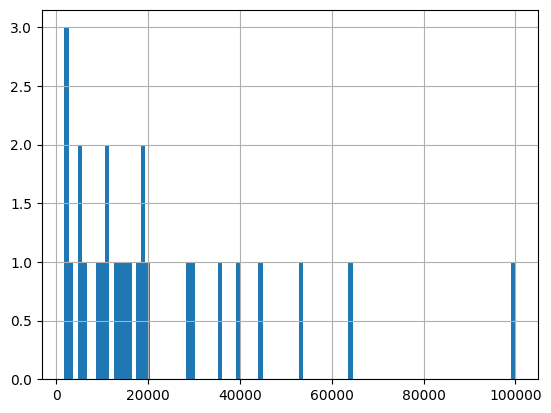

In [128]:
unfiltered_categories['Weight'].hist(bins=100)

In [129]:
# Unfiltered cats max, min and average
max_weight = unfiltered_categories['Weight'].max()  # Maximum value
min_weight = unfiltered_categories['Weight'].min()  # Minimum value
average_weight = unfiltered_categories['Weight'].mean()  # Average value

print(np.quantile(unfiltered_categories['Weight'],0.50))
print('Max:',max_weight)
print('Min:', min_weight)
print('Average:',average_weight)

15130.0
Max: 99954
Min: 1778
Average: 22058.11111111111


In [130]:
# We create the network between different genres and name it filtered_csv_file
categories_filtered = study_categories[study_categories['Source'] != study_categories['Target']]
categories_filtered.to_csv('filtered_csv_file.csv', index=False)

In [131]:
file_path = 'filtered_csv_file.csv'
filtered_categories = pd.read_csv(file_path)

<Axes: >

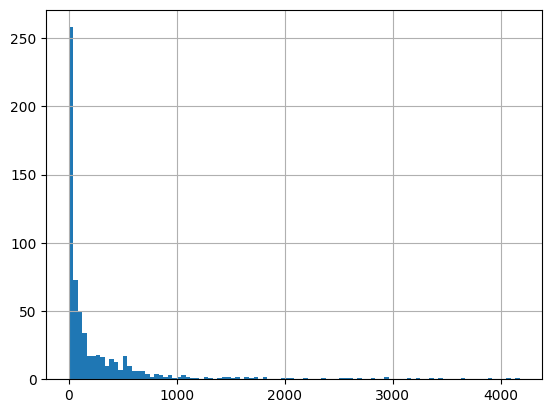

In [132]:
# Weight distribution of filtered categories
filtered_categories['Weight'].hist(bins=100)

In [133]:
# Top 10 categories (from filtered categories) sorted by weight
filtered_categories.sort_values(by='Weight', ascending=False).head(10)

,Source,Target,Weight
484,Religion & Spirituality,"Health, Mind & Body",4173
415,Nonfiction,History,4057
238,"Health, Mind & Body",Religion & Spirituality,3895
261,History,Nonfiction,3665
424,Nonfiction,Religion & Spirituality,3445
414,Nonfiction,"Health, Mind & Body",3375
39,Biographies & Memoirs,Literature & Fiction,3226
492,Religion & Spirituality,Nonfiction,3160
334,Literature & Fiction,Biographies & Memoirs,2962
235,"Health, Mind & Body",Nonfiction,2937


In [134]:
# With the following information the goal is to observe the data and compare it with the previous ones
max_weight = filtered_categories['Weight'].max()  
min_weight = filtered_categories['Weight'].min()  
average_weight = filtered_categories['Weight'].mean()  

print(np.quantile(filtered_categories['Weight'],0.50))
print('Max:',max_weight)
print('Min:', min_weight)
print('Average:',average_weight)

76.5
Max: 4173
Min: 1
Average: 300.94827586206895


In [135]:
# 4 communities were found in the filtered genre-genre network
file_path = 'modularidade_rede_categoria_categoria_filtrada.csv'
filtered_csv_modularity = pd.read_csv(file_path)
filtered_csv_modularity.set_index('Id')

,modularity_class
Id,
Arts & Photography,2
Biographies & Memoirs,1
Business & Investing,1
Children's Books,0
Comics & Graphic Novels,0
Computers & Internet,2
"Cooking, Food & Wine",1
Engineering,2
Entertainment,0


In [136]:
# We group together genres that are from the same community, so we know how they are composed
grouped_genres = filtered_csv_modularity.groupby('modularity_class')
groups = {name: group for name, group in grouped_genres}
groups

{0:                            Id  modularity_class
 3            Children's Books                 0
 4     Comics & Graphic Novels                 0
 8               Entertainment                 0
 12                     Horror                 0
 14       Literature & Fiction                 0
 16        Mystery & Thrillers                 0
 21                    Romance                 0
 23  Science Fiction & Fantasy                 0
 25                      Teens                 0,
 1:                          Id  modularity_class
 1     Biographies & Memoirs                 1
 2      Business & Investing                 1
 6      Cooking, Food & Wine                 1
 9       Health, Mind & Body                 1
 10                  History                 1
 13                      Law                 1
 15                 Medicine                 1
 17               Nonfiction                 1
 20  Religion & Spirituality                 1
 24                   Sports     

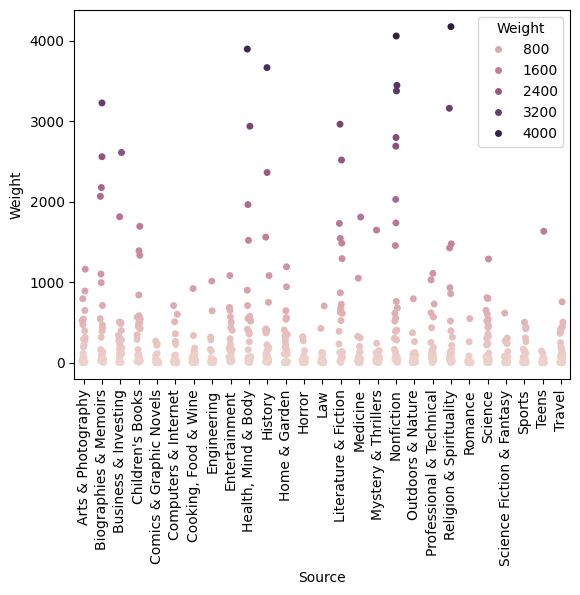

In [137]:
# A stripplot was created based on categories_filtered 
sns.stripplot(data=categories_filtered, x='Source', y='Weight', hue='Weight')
plt.xticks(rotation=90)
plt.show()

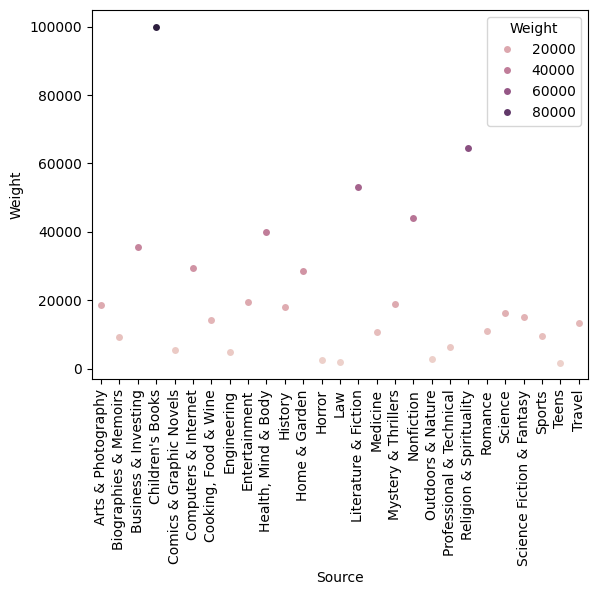

In [138]:
#A stripplot was created based on unfiltered_categories 
sns.stripplot(data=unfiltered_categories, x='Source', y='Weight', hue='Weight')
plt.xticks(rotation=90)
plt.show()

In [139]:
# The following to steps were created with the aim to compare and analyse the genre relation when books are the same genre and when they are from different genre
# Step 1 - We create a new column in study_categories so that we can know wich wich objects that are related are form the same/ different genre
study_categories['Genre Relation'] = np.where(study_categories['Source'] == study_categories['Target'],'Same Genre', 'Different Genre')

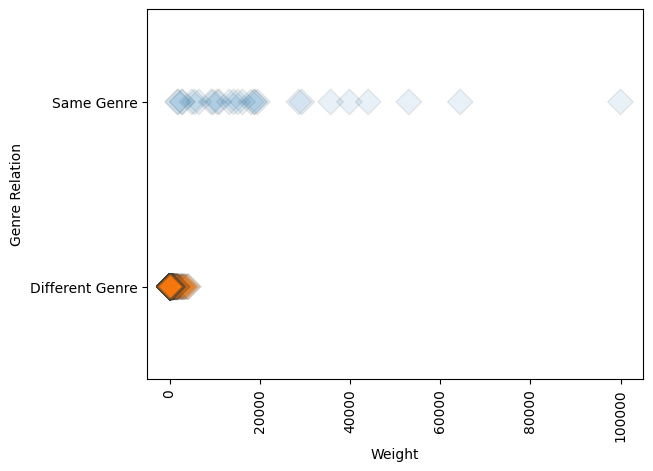

In [140]:
#Step 2 - Creation of a Strippplot -Opens the possibility to visualy analyse the existing relation between genre and weight
sns.stripplot(data=study_categories, x='Weight', y='Genre Relation', hue='Genre Relation', jitter=False, s=13, marker="D", linewidth=1, alpha=.1,)
plt.xticks(rotation=90)
plt.show()

### Q2 -  What different genres are often bought together?
--- Let's normalize the data ---

In [141]:
# Let's refresh our memory
filtered_categories

,Source,Target,Weight
0,Arts & Photography,Biographies & Memoirs,473
1,Arts & Photography,Business & Investing,276
2,Arts & Photography,Children's Books,650
3,Arts & Photography,Comics & Graphic Novels,114
4,Arts & Photography,Computers & Internet,198
...,...,...,...
633,Travel,Religion & Spirituality,176
634,Travel,Science,249
635,Travel,Science Fiction & Fantasy,1
636,Travel,Sports,504


In [142]:
# Let's refresh our memory
book_categories

categories
Children's Books             30496
Nonfiction                   23670
Religion & Spirituality      23551
Literature & Fiction         21887
Health, Mind & Body          16707
Business & Investing         14745
Home & Garden                10995
History                      10481
Computers & Internet         10441
Entertainment                 9075
Biographies & Memoirs         9022
Arts & Photography            8999
Science                       8245
Travel                        7083
Mystery & Thrillers           6822
Medicine                      5426
Science Fiction & Fantasy     5401
Cooking, Food & Wine          5209
Sports                        4148
Professional & Technical      4102
Romance                       3833
Engineering                   2774
Comics & Graphic Novels       2216
Outdoors & Nature             1665
Law                           1495
Teens                         1188
Horror                        1146
Name: count, dtype: int64

In [143]:
# To normalize the data we need to evaluate the weights
book_categories_df = book_categories.reset_index()
book_categories_df.columns = ['Category', 'Value']

In [144]:
book_categories_df

,Category,Value
0,Children's Books,30496
1,Nonfiction,23670
2,Religion & Spirituality,23551
3,Literature & Fiction,21887
4,"Health, Mind & Body",16707
5,Business & Investing,14745
6,Home & Garden,10995
7,History,10481
8,Computers & Internet,10441
9,Entertainment,9075


In [145]:
#From this dataframe let's compare the weights and see how much they've changed. Is the heaviest relation still the same?
merged_df = pd.merge(filtered_categories, book_categories_df, left_on='Source', right_on='Category', how='left')
merged_target = pd.merge(merged_df, book_categories_df, left_on='Target', right_on='Category', how='left')
merged_target['Min_value'] = merged_target[['Value_x', 'Value_y']].min(axis=1)
merged_target['Max_value'] = merged_target[['Value_x', 'Value_y']].max(axis=1)
merged_target['Normalized_weight'] = (merged_target['Weight']/merged_target['Min_value'])
merged_target

,Source,Target,Weight,Category_x,Value_x,Category_y,Value_y,Min_value,Max_value,Normalized_weight
0,Arts & Photography,Biographies & Memoirs,473,Arts & Photography,8999,Biographies & Memoirs,9022,8999,9022,0.052561
1,Arts & Photography,Business & Investing,276,Arts & Photography,8999,Business & Investing,14745,8999,14745,0.030670
2,Arts & Photography,Children's Books,650,Arts & Photography,8999,Children's Books,30496,8999,30496,0.072230
3,Arts & Photography,Comics & Graphic Novels,114,Arts & Photography,8999,Comics & Graphic Novels,2216,2216,8999,0.051444
4,Arts & Photography,Computers & Internet,198,Arts & Photography,8999,Computers & Internet,10441,8999,10441,0.022002
...,...,...,...,...,...,...,...,...,...,...
633,Travel,Religion & Spirituality,176,Travel,7083,Religion & Spirituality,23551,7083,23551,0.024848
634,Travel,Science,249,Travel,7083,Science,8245,7083,8245,0.035155
635,Travel,Science Fiction & Fantasy,1,Travel,7083,Science Fiction & Fantasy,5401,5401,7083,0.000185
636,Travel,Sports,504,Travel,7083,Sports,4148,4148,7083,0.121504


In [146]:
#sorce - target - normalized weight
merged_target[['Source','Target','Normalized_weight']].sort_values(by='Normalized_weight', ascending=False).head(10)

,Source,Target,Normalized_weight
100,Children's Books,Teens,1.425926
594,Teens,Children's Books,1.374579
537,Science,Outdoors & Nature,0.479279
449,Outdoors & Nature,Science,0.476877
326,Law,Nonfiction,0.471572
418,Nonfiction,Law,0.456187
415,Nonfiction,History,0.387081
191,Engineering,Science,0.365537
39,Biographies & Memoirs,Literature & Fiction,0.357570
261,History,Nonfiction,0.349680


In [147]:
#  source - target - Original weight
merged_target[['Source','Target','Weight']].sort_values(by ='Weight', ascending=False).head(10)

,Source,Target,Weight
484,Religion & Spirituality,"Health, Mind & Body",4173
415,Nonfiction,History,4057
238,"Health, Mind & Body",Religion & Spirituality,3895
261,History,Nonfiction,3665
424,Nonfiction,Religion & Spirituality,3445
414,Nonfiction,"Health, Mind & Body",3375
39,Biographies & Memoirs,Literature & Fiction,3226
492,Religion & Spirituality,Nonfiction,3160
334,Literature & Fiction,Biographies & Memoirs,2962
235,"Health, Mind & Body",Nonfiction,2937


In [148]:
analysis_normalized_df = merged_target[['Source','Target','Normalized_weight']]

In [149]:
analysis_unnormalized_df = merged_target[['Source','Target','Weight']]

In [150]:
# Now that we normalized the data lets identify and rank the top 10 based on normalized weight
analysis_normalized_df ['pair'] = analysis_normalized_df .apply(lambda row: tuple(sorted([row['Source'], row['Target']])), axis=1)

duplicated_pairs = analysis_normalized_df[analysis_normalized_df .duplicated('pair', keep=False)]

genre_analysis = duplicated_pairs.loc[duplicated_pairs.groupby('pair')['Normalized_weight'].idxmax()]

genre_analysis = genre_analysis.drop(columns=['pair'])
genre_analysis.sort_values(by='Normalized_weight', ascending=False).head(10)

C:\Users\Joana Okica\AppData\Local\Temp\ipykernel_17404\4259541288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_normalized_df ['pair'] = analysis_normalized_df .apply(lambda row: tuple(sorted([row['Source'], row['Target']])), axis=1)


,Source,Target,Normalized_weight
100,Children's Books,Teens,1.425926
537,Science,Outdoors & Nature,0.479279
326,Law,Nonfiction,0.471572
415,Nonfiction,History,0.387081
191,Engineering,Science,0.365537
39,Biographies & Memoirs,Literature & Fiction,0.357570
345,Literature & Fiction,Horror,0.341187
368,Medicine,"Health, Mind & Body",0.333395
315,Law,Business & Investing,0.284950
35,Biographies & Memoirs,History,0.283529


In [151]:
# Now that we normalized the data lets identify and rank the top 10 based on unnormalized weight
analysis_unnormalized_df['pair'] = analysis_unnormalized_df.apply(lambda row: tuple(sorted([row['Source'], row['Target']])), axis=1)

# Encontrar os pares duplicados
duplicated_pairs = analysis_unnormalized_df[analysis_unnormalized_df.duplicated('pair', keep=False)]

# Seleciono a linha com o maior valor de Normalized_weight para cada par
genre_analysis = duplicated_pairs.loc[duplicated_pairs.groupby('pair')['Weight'].idxmax()]


genre_analysis = genre_analysis.drop(columns=['pair'])
genre_analysis.sort_values(by='Weight', ascending=False).head(10)

C:\Users\Joana Okica\AppData\Local\Temp\ipykernel_17404\3406899251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_unnormalized_df['pair'] = analysis_unnormalized_df.apply(lambda row: tuple(sorted([row['Source'], row['Target']])), axis=1)


,Source,Target,Weight
484,Religion & Spirituality,"Health, Mind & Body",4173
415,Nonfiction,History,4057
424,Nonfiction,Religion & Spirituality,3445
414,Nonfiction,"Health, Mind & Body",3375
39,Biographies & Memoirs,Literature & Fiction,3226
407,Nonfiction,Business & Investing,2797
419,Nonfiction,Literature & Fiction,2689
35,Biographies & Memoirs,History,2558
42,Biographies & Memoirs,Nonfiction,2176
45,Biographies & Memoirs,Religion & Spirituality,2066


## Network Product-Product

----- Process to create network product-product -----

In [152]:
# Refresh our memory
count_ids_by_similarities

,similarities,id
0,0001472933,2
1,0001955071,1
2,0002154129,10
3,0002154463,6
4,0002159317,3
...,...,...
152488,9997053060,2
152489,9999366651,2
152490,B00008JYQ3,6
152491,B00008NRHJ,5


In [154]:
# I select the products that are in id and similarities
similarities_set = set(book_exploded['similarities'])

filtered_df = book[book['id'].isin(similarities_set)]

id_set = set(filtered_df['id'])
filtered_df

,id,group,title,similarities,categories,reviews,similarity_count
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,"[0804215715, 156101074X, 0687023955, 068707423...",Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
1,0738700797,Book,Candlemas: Feast of Flames,"[0738700827, 1567184960, 1567182836, 073870052...",Religion & Spirituality,"[A11NCO6YTE4BTJ - 5, A9CQ3PLRNIR83 - 4, A13SG9...",5
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,"[0842328130, 0830818138, 0842330313, 084232861...",Religion & Spirituality,[A2591BUPXCS705 - 4],5
4,1577943082,Book,Prayers That Avail Much for Business: Executive,"[157794349X, 0892749504, 1577941829, 089274956...",Religion & Spirituality,[],5
7,0231118597,Book,Losing Matt Shepard,"[B000067D0Y, 0375727191, 080148605X, 156023257...",Nonfiction,"[A2F1X6YFCJZ1FH - 5, A1OZQCZAK21S6M - 5, AL5D5...",5
...,...,...,...,...,...,...,...
516502,0465028721,Book,The Diligent: A Voyage through the Worlds of t...,"[0684835657, 0198205287, 0521627249, 052159649...",History,"[A267SCCYKZLW2B - 4, A1EC5AQQS9XURP - 4, A2UDS...",5
516503,2060000912,Book,Michelin the Green Guide Berlin and Potsdam (M...,"[1886705410, 0789494302, 2060000335, 188659007...",Travel,[A33WM7N3DJMTI4 - 5],5
516504,4770027613,Book,Japanese Country Style: Putting New Life into ...,"[0804832625, 158685027X, 4770023537, 081183675...",Home & Garden,[A39B12UH2GKX3O - 5],5
516510,0310208084,Book,Ten Time Bombs,"[0310479711, 0802436471, 0684856093, 155874777...",Children's Books,[A90BU54VLIVNS - 5],5


In [155]:
# Now let's do the same as the previous line but for the similarities
filtered_exploded = filtered_df.explode('similarities')
product_analysis = filtered_exploded[filtered_exploded['similarities'].isin(id_set)]
product_analysis = product_analysis[['id','similarities']]
product_analysis

,id,similarities
0,0827229534,0804215715
0,0827229534,156101074X
0,0827229534,0687023955
0,0827229534,0687074231
0,0827229534,082721619X
...,...,...
516510,0310208084,0684856093
516510,0310208084,155874777X
516510,0310208084,074321546X
516530,0879736836,1580510469


In [156]:
product_analysis.id.nunique()

150450

In [157]:
len(set.intersection(set(product_analysis.id),set(product_analysis.similarities)))

143219

In [158]:
#We create the csv that shows the relationship between products. We call this file file_productsRelation
product_analysis.to_csv('file_productsRelation.csv')
product_analysis

,id,similarities
0,0827229534,0804215715
0,0827229534,156101074X
0,0827229534,0687023955
0,0827229534,0687074231
0,0827229534,082721619X
...,...,...
516510,0310208084,0684856093
516510,0310208084,155874777X
516510,0310208084,074321546X
516530,0879736836,1580510469


In [160]:
# This calculation only serves to check that I'm not losing identifiers or introducing errors in the code between study components
unique_sources = product_analysis['id'].nunique()
unique_targets = product_analysis['similarities'].nunique()

total_unique_identifiers = len(set(product_analysis['id'].unique()).union(set(product_analysis['similarities'].unique())))
unique_sources, unique_targets, total_unique_identifiers

(150450, 144035, 151266)

### Q3 - Network modeling makes it possible to go beyond recommendations: who bought X also bought Y? 

In [199]:
# The file containing the modularity of the product-product network was imported from gephi
file_path ='modularidade_rede_produto.csv'
product_h = pd.read_csv(file_path)
product_h

,Id,modularity_class
0,827229534,317
1,804215715,317
2,156101074X,317
3,687023955,317
4,687074231,317
...,...,...
151261,007219183X,460
151262,1564553078,719
151263,312304145,2398
151264,849995949,522


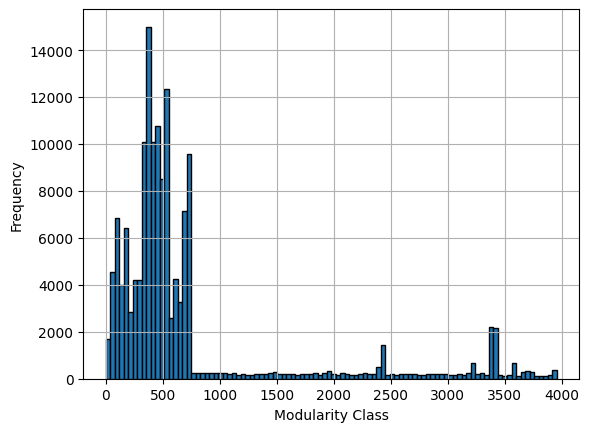

In [200]:
product_h['modularity_class'].hist(bins=100, edgecolor='black')
plt.xlabel('Modularity Class')
plt.ylabel('Frequency')
plt.show()

In [201]:
product_h['Id'] = product_h['Id'].apply(lambda id_value: id_value.lstrip('0'))
product_h

,Id,modularity_class
0,827229534,317
1,804215715,317
2,156101074X,317
3,687023955,317
4,687074231,317
...,...,...
151261,7219183X,460
151262,1564553078,719
151263,312304145,2398
151264,849995949,522


In [202]:
book['id'] = book['id'].apply(lambda id_value: id_value.lstrip('0'))
book

,id,group,title,similarities,categories,reviews,similarity_count
0,827229534,Book,Patterns of Preaching: A Sermon Sampler,"[804215715, 156101074X, 687023955, 687074231, ...",Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
1,738700797,Book,Candlemas: Feast of Flames,"[738700827, 1567184960, 1567182836, 738700525,...",Religion & Spirituality,"[A11NCO6YTE4BTJ - 5, A9CQ3PLRNIR83 - 4, A13SG9...",5
3,842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,"[842328130, 830818138, 842330313, 842328610, 8...",Religion & Spirituality,[A2591BUPXCS705 - 4],5
4,1577943082,Book,Prayers That Avail Much for Business: Executive,"[157794349X, 892749504, 1577941829, 892749563,...",Religion & Spirituality,[],5
5,486220125,Book,How the Other Half Lives: Studies Among the Te...,"[486401960, 452283612, 486229076, 714840343, 3...",History,"[ATVPDKIKX0DER - 5, AUEZ7NVOEHYRY - 5, ATVPDKI...",5
...,...,...,...,...,...,...,...
516511,6176909,Book,House of Cards,"[6471641, 6477097, B00009MGGI, 6497993, 679727...",Mystery & Thrillers,"[A1MMBWP20WQ2N3 - 5, A3R803J7QXVUI1 - 3, A2FOS...",5
516512,786632550,Book,Mel Bay's Complete Traditional Holiday Season ...,"[079357000X, 793529395, 793585031, 634002066]",Entertainment,"[AR0807T2MTJBL - 4, A2CC70LC14MNT7 - 5, A29TSN...",4
516514,4770023286,Book,Sengai: Master Zen Painter,"[4770029446, 1570624895]",Arts & Photography,[AOV39AQYLNIRG - 4],2
516521,60537612,Book,If You Take a Mouse Five-Book Set (If You Take...,"[689808747, 689820305, 859531821, 60266864, 91...",Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV...",5


In [203]:
# Merging dataframes from the ID
product_h['Id'] = product_h['Id'].astype(str)
merged_data = pd.merge(product_h, book, left_on='Id', right_on='id')
merged_data

,Id,modularity_class,id,group,title,similarities,categories,reviews,similarity_count
0,827229534,317,827229534,Book,Patterns of Preaching: A Sermon Sampler,"[804215715, 156101074X, 687023955, 687074231, ...",Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
1,804215715,317,804215715,Book,Witness of Preaching,"[687336481, 827229534, 156101074X, 802801323, ...",Religion & Spirituality,"[A1TO3ZZR8OCT5Q - 5, AKNWBSH0XOV0O - 5, A3P062...",5
2,156101074X,317,156101074X,Book,The Preaching Life,"[1561011576, 1561011673, 687336481, 664228860,...",Religion & Spirituality,"[A2YW034WITERZV - 5, A3O8EU8VP833XL - 5, AZNB8...",5
3,687023955,317,687023955,Book,The Four Pages of the Sermon: A Guide to Bibli...,"[156101074X, 804215715, 827229534, 687074231, ...",Religion & Spirituality,"[A1HCDBN8IQNAU - 5, A1YQCMHTVDVC64 - 3, A1EVXA...",5
4,687074231,317,687074231,Book,Performing the Word: Preaching As Theatre,"[687023955, 827229534, 664222641, 080284152X, ...",Religion & Spirituality,"[A2YL693G8I5WQO - 5, A249XSNS8KJ7N3 - 5]",5
...,...,...,...,...,...,...,...,...,...
151261,7219183X,460,7219183X,Book,Apache Server 2.0: A Beginner's Guide,"[672323559, 72223448, 1861007221, 782141374, 1...",Computers & Internet,"[A23WXUPDTBKP9S - 5, A36DIMVV0RLOM4 - 3, A1PCO...",5
151262,1564553078,719,1564553078,Book,The Future of God: The Reclaiming of Spiritual...,"[375413189, 345391691, 345384563, 345406044, 5...",Religion & Spirituality,"[A22F47HRANO8EH - 4, A2KA9AWFSHK1OF - 4]",5
151263,312304145,2398,312304145,Book,"The Murad Method: Wrinkle-Proof, Repair, and R...","[312331061, 312334613, 1561709530, 446677760, ...","Health, Mind & Body","[A3A64AFD4K2ONK - 5, AFVQZQ8PW0L - 5, A1Y3Y7DN...",5
151264,849995949,522,849995949,Book,Leadership Promises for Every Day,"[718006593, 785263500, 785274324, 785264191, 7...",Religion & Spirituality,"[A1LMWXP2HMNMP3 - 5, A10WXIR6DPY406 - 5, AI22V...",5


In [204]:
# Organize the communities
test_group = product_h.groupby('modularity_class')
modularity_grouped = {name: group for name, group in test_group}
modularity_grouped

{0:             Id  modularity_class
 26  1590770218                 0
 27   871319640                 0,
 1:                 Id  modularity_class
 60       471150274                 1
 61       13061081X                 1
 62      1852331666                 1
 63        70121893                 1
 141119  1584502657                 1,
 2:                Id  modularity_class
 67      439240751                 2
 68      439240727                 2
 69      439240719                 2
 70      439240700                 2
 71       61062499                 2
 60878   439240735                 2
 60879   439240743                 2
 60880   439472199                 2
 87326   439492270                 2
 93013    61063959                 2
 93014    61062928                 2
 93015    6106632X                 2
 107580   61068268                 2
 107581   61066060                 2
 109470   61065447                 2
 109471   61058769                 2
 109472   61066729            

In [205]:
# Remove leading zero if ID is numeric and starts with zero
def remove_leading_zero(id_value):
    return id_value.lstrip('0') if id_value.isdigit() else id_value

book['similarities'] = book['similarities'].apply(lambda sim_list: [remove_leading_zero(sim_id) for sim_id in sim_list])

In [206]:
book

,id,group,title,similarities,categories,reviews,similarity_count
0,827229534,Book,Patterns of Preaching: A Sermon Sampler,"[804215715, 156101074X, 687023955, 687074231, ...",Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
1,738700797,Book,Candlemas: Feast of Flames,"[738700827, 1567184960, 1567182836, 738700525,...",Religion & Spirituality,"[A11NCO6YTE4BTJ - 5, A9CQ3PLRNIR83 - 4, A13SG9...",5
3,842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,"[842328130, 830818138, 842330313, 842328610, 8...",Religion & Spirituality,[A2591BUPXCS705 - 4],5
4,1577943082,Book,Prayers That Avail Much for Business: Executive,"[157794349X, 892749504, 1577941829, 892749563,...",Religion & Spirituality,[],5
5,486220125,Book,How the Other Half Lives: Studies Among the Te...,"[486401960, 452283612, 486229076, 714840343, 3...",History,"[ATVPDKIKX0DER - 5, AUEZ7NVOEHYRY - 5, ATVPDKI...",5
...,...,...,...,...,...,...,...
516511,6176909,Book,House of Cards,"[6471641, 6477097, B00009MGGI, 6497993, 679727...",Mystery & Thrillers,"[A1MMBWP20WQ2N3 - 5, A3R803J7QXVUI1 - 3, A2FOS...",5
516512,786632550,Book,Mel Bay's Complete Traditional Holiday Season ...,"[079357000X, 793529395, 793585031, 634002066]",Entertainment,"[AR0807T2MTJBL - 4, A2CC70LC14MNT7 - 5, A29TSN...",4
516514,4770023286,Book,Sengai: Master Zen Painter,"[4770029446, 1570624895]",Arts & Photography,[AOV39AQYLNIRG - 4],2
516521,60537612,Book,If You Take a Mouse Five-Book Set (If You Take...,"[689808747, 689820305, 859531821, 60266864, 91...",Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV...",5


In [207]:
# Lets observe the comminity with id = 0
study_relations = merged_data[merged_data.modularity_class==0]
study_relations

,Id,modularity_class,id,group,title,similarities,categories,reviews,similarity_count
26,1590770218,0,1590770218,Book,Fantastic Food with Splenda : 160 Great Recipe...,"[871319640, 399530258, 1590770536, 158040197X,...","Health, Mind & Body","[A2V9UBVMQFDV20 - 5, A3NXQLHXJZO5FB - 5, A1RNV...",5
27,871319640,0,871319640,Book,Unbelievable Desserts With Splenda: Sweet Trea...,"[1590770218, 399530258, 158040197X, 1590770536...","Cooking, Food & Wine","[A1PHRH2VWCT2XT - 5, A3FNPLH42B9U8T - 5, ASLJO...",5


In [208]:
# Now let's extend the initial list of communities
id_list = study_relations['id'].tolist()
study_relations['match'] = [[] for _ in range(len(study_relations))]
study_relations['diff'] = [[] for _ in range(len(study_relations))]

# Compare the elements of the ID list with the similarities column
for index, row in study_relations.iterrows():
    match_set = set()
    diff_set = set()
    
    for item in row['similarities']:
        if item in id_list:
            match_set.add(item)
        else:
            diff_set.add(item)
    
     # Assign the sets to the corresponding columns, removing duplicates
    study_relations.at[index, 'match'] = list(match_set)
    study_relations.at[index, 'diff'] = list(diff_set)

study_relations

C:\Users\Joana Okica\AppData\Local\Temp\ipykernel_17404\2377127648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  study_relations['match'] = [[] for _ in range(len(study_relations))]
C:\Users\Joana Okica\AppData\Local\Temp\ipykernel_17404\2377127648.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  study_relations['diff'] = [[] for _ in range(len(study_relations))]


,Id,modularity_class,id,group,title,similarities,categories,reviews,similarity_count,match,diff
26,1590770218,0,1590770218,Book,Fantastic Food with Splenda : 160 Great Recipe...,"[871319640, 399530258, 1590770536, 158040197X,...","Health, Mind & Body","[A2V9UBVMQFDV20 - 5, A3NXQLHXJZO5FB - 5, A1RNV...",5,[871319640],"[1569244286, 158040197X, 1590770536, 399530258]"
27,871319640,0,871319640,Book,Unbelievable Desserts With Splenda: Sweet Trea...,"[1590770218, 399530258, 158040197X, 1590770536...","Cooking, Food & Wine","[A1PHRH2VWCT2XT - 5, A3FNPLH42B9U8T - 5, ASLJO...",5,[1590770218],"[158040197X, 1590770536, 471393266, 399530258]"


In [209]:
final_results = pd.DataFrame()

# Loop over modularity_class values from 0 to 3956
for class_value in range(3957):
    study_relations = merged_data[merged_data.modularity_class == class_value].copy()
    
    if study_relations.empty:
        continue  
    
    id_list = study_relations['id'].tolist()
    study_relations['match'] = [[] for _ in range(len(study_relations))]
    study_relations['diff'] = [[] for _ in range(len(study_relations))]

    # Comparar ids com  similarities
    for index, row in study_relations.iterrows():
        match_set = set()
        diff_set = set()
        
        for item in row['similarities']:
            if item in id_list:
                match_set.add(item)
            else:
                diff_set.add(item)
        
        study_relations.at[index, 'match'] = list(match_set)
        study_relations.at[index, 'diff'] = list(diff_set)
    
    final_results = pd.concat([final_results, study_relations], ignore_index=True)

final_results[['id','modularity_class','similarities','match','diff']]


,id,modularity_class,similarities,match,diff
0,1590770218,0,"[871319640, 399530258, 1590770536, 158040197X,...",[871319640],"[1569244286, 158040197X, 1590770536, 399530258]"
1,871319640,0,"[1590770218, 399530258, 158040197X, 1590770536...",[1590770218],"[158040197X, 1590770536, 471393266, 399530258]"
2,471150274,1,"[471203092, 013061081X, 130081779, 1852331666,...","[70121893, 1852331666]","[013061081X, 130081779, 471203092]"
3,13061081X,1,"[130081779, 471150274, 471203092, 70121893, 15...","[471150274, 1584502657, 70121893]","[130081779, 471203092]"
4,1852331666,1,"[130081779, 471203092, 013061081X, 471150274, ...","[471150274, 70121893]","[013061081X, 130081779, 471203092]"
...,...,...,...,...,...
151261,1561709077,3954,"[60567228, 1569244537, 1932205306, 972805028, ...",[],"[1932205306, 60567228, 1569244537, 1578261651,..."
151262,1590130049,3955,"[1590130065, 1590130162, 1590130170, 159013031...",[1590130065],"[1590130316, 1590130170, 1590130324, 1590130162]"
151263,1590130065,3955,"[1590130316, 1590130324, 1590130014, 159013038...",[],"[1590130022, 1590130014, 1590130324, 159013031..."
151264,1889182508,3956,"[1889182613, 188918263X, 1889182966, 188918210...",[1889182613],"[1889182109, 786934301, 188918263X, 1889182966]"


In [210]:
# See which communities have more than 6 elements because for the elements in these communities we can expand the number of recommendations made initially
# Size - 1054 comunidades
modularity_grouped_more_than_6_elements = {name: group for name, group in modularity_grouped.items() if len(group) > 6}
modularity_grouped_more_than_6_elements

{2:                Id  modularity_class
 67      439240751                 2
 68      439240727                 2
 69      439240719                 2
 70      439240700                 2
 71       61062499                 2
 60878   439240735                 2
 60879   439240743                 2
 60880   439472199                 2
 87326   439492270                 2
 93013    61063959                 2
 93014    61062928                 2
 93015    6106632X                 2
 107580   61068268                 2
 107581   61066060                 2
 109470   61065447                 2
 109471   61058769                 2
 109472   61066729                 2
 109573   61065579                 2
 124393   61065404                 2
 124394   61065595                 2
 134171   61065420                 2,
 3:                Id  modularity_class
 126     375803394                 3
 127     37580336X                 3
 128      61066249                 3
 65500   375813608             

In [211]:
prove = filtered_df[filtered_df['id'] == '0439240751']['similarities']
len(prove.iloc[0])
prove = filtered_df[filtered_df['id'] == '0439240751']
prove
# Initially 0439240751 was assigned 5 similar products 
# [0439492327, 0439240727, 0439240719, 043924070]

,id,group,title,similarities,categories,reviews,similarity_count
32,0439240751,Book,"Double Jeopardy (T*Witches, 6)","[0439492327, 0439240727, 0439240719, 043924070...",Children's Books,"[A3UN6WX5RRO2AG - 5, A1P2QBVLWTN7JP - 5, A3UN6...",5


In [212]:
# Let's quantify this percentage
total_elements = sum(len(group) for group in modularity_grouped_more_than_6_elements.values())
percentage = total_elements/151266 * 100
percentage
# We can say that 93%  

93.9735300728518

In [213]:
modularity_grouped_less_6_elements = {name: group for name, group in modularity_grouped.items() if len(group) <= 6}
len(modularity_grouped_less_6_elements)

2903

In [214]:
elementos_por_comunidade = test_group.size()

media_elementos_por_comunidade = elementos_por_comunidade.mean()
min_elementos_por_comunidade = elementos_por_comunidade.min()
max_elementos_por_comunidade = elementos_por_comunidade.max()

print("Mean:", media_elementos_por_comunidade)
print("Min:", min_elementos_por_comunidade)
print("Max:", max_elementos_por_comunidade)
# So we know that at the most a community has about 4736 elements, at the least it has 2 and on average communities have about 38 elements

Mean: 38.227445034116755
Min: 2
Max: 4736


In [215]:
test_group = product_h.groupby('modularity_class').size()
quantidade_grupo = test_group[test_group>5].count()

print(quantidade_grupo, "of the 3,957 communities, have more than 5 members")

1291 of the 3,957 communities, have more than 5 members


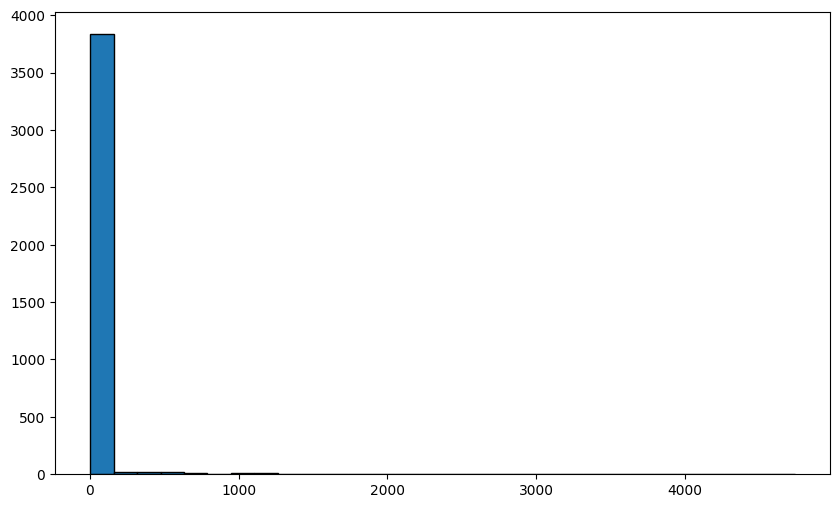

In [216]:
# Criar o histograma
test_group = product_h.groupby('modularity_class').size()

plt.figure(figsize=(10, 6))
plt.hist(test_group, bins=30, edgecolor='black')
plt.show()

### Q4 - What is the gender variability within communities?

In [217]:
len([elemento for elemento in product_h.index.to_list()if elemento not in book.id ])

78445

In [218]:
merged_data[merged_data.modularity_class==2]

,Id,modularity_class,id,group,title,similarities,categories,reviews,similarity_count
67,439240751,2,439240751,Book,"Double Jeopardy (T*Witches, 6)","[439492327, 439240727, 439240719, 439240700, 6...",Children's Books,"[A3UN6WX5RRO2AG - 5, A1P2QBVLWTN7JP - 5, A3UN6...",5
68,439240727,2,439240727,Book,T'witches #03 : Seeing Is Deceiving (T*Witches),"[439240743, 439492270, 439472199, 439240751, 4...",Children's Books,"[A2M89Y5RYSKCRG - 5, A2C32KV79E0EC - 5, A3890L...",5
69,439240719,2,439240719,Book,T'witches #02 : Building A Mystery (T*Witches),"[439240735, 439240743, 439240700, 439240751, 4...",Children's Books,"[A2VCGJLKGK2WJJ - 5, A2AH3JLOTUFMQ8 - 4, A2M89...",5
70,439240700,2,439240700,Book,"The Power of Two (T*Witches, No 1)","[439240727, 439240735, 439240743, 439240751, 4...",Children's Books,"[A2GFVWVEASOW0S - 3, A2VCGJLKGK2WJJ - 5, A2M89...",5
71,61062499,2,61062499,Book,Ashleigh's Christmas Miracle (Thoroughbred Super),"[61063959, 61062928, 61064947, 61065420, 61065...",Children's Books,"[ATVPDKIKX0DER - 5, ATVPDKIKX0DER - 5, ATVPDKI...",5
60878,439240735,2,439240735,Book,T'witches #04 : Dead Wrong (T*Witches),"[439472199, 439492270, 439492300, 439492327, 4...",Children's Books,"[A3UN6WX5RRO2AG - 4, A3UN6WX5RRO2AG - 3, A2M89...",5
60879,439240743,2,439240743,Book,T*Witches #5: Don't Think Twice,"[439492270, 439240727, 439492300, 439492327, 4...",Children's Books,"[A1P2QBVLWTN7JP - 5, AJRXLIEXP26JT - 5, A3UN6W...",5
60880,439472199,2,439472199,Book,"Kindred Spirits (T*Witches, 7)","[439240735, 439240727, 439240719, 439240700, 7...",Children's Books,"[A3UN6WX5RRO2AG - 5, A24RVLCFYM72YC - 5, AAORN...",5
87326,439492270,2,439492270,Book,T*witches #8 (T*Witches),"[439240751, 439240743, 439240735, 439240727, 4...",Children's Books,"[A3VXL1XQ8AWNYP - 5, ANCFK70YHB3TN - 5, A2FI8J...",5
93013,61063959,2,61063959,Book,Ashleigh's Hope (Thoroughbred Prequel),"[61062499, 61065587, 61062928, 61064947, 00610...",Children's Books,"[ATVPDKIKX0DER - 5, ATVPDKIKX0DER - 5, ATVPDKI...",5


In [219]:
# Now we the association of the id - categories - modularity class
category_modularity_data = merged_data[['id', 'categories', 'modularity_class']]
category_modularity_data

,id,categories,modularity_class
0,827229534,Religion & Spirituality,317
1,804215715,Religion & Spirituality,317
2,156101074X,Religion & Spirituality,317
3,687023955,Religion & Spirituality,317
4,687074231,Religion & Spirituality,317
...,...,...,...
151261,7219183X,Computers & Internet,460
151262,1564553078,Religion & Spirituality,719
151263,312304145,"Health, Mind & Body",2398
151264,849995949,Religion & Spirituality,522


In [220]:
category_counts = category_modularity_data.groupby('modularity_class')['categories'].nunique()

# Filter classes that only have a single category
single_category_classes = category_counts[category_counts == 1]

# Calculate the percentage
total_classes = len(category_counts)
single_category_percentage = len(single_category_classes) / total_classes * 100

single_category_percentage

62.67374273439474

In [221]:
data = merged_data[['categories', 'modularity_class']]
data

,categories,modularity_class
0,Religion & Spirituality,317
1,Religion & Spirituality,317
2,Religion & Spirituality,317
3,Religion & Spirituality,317
4,Religion & Spirituality,317
...,...,...
151261,Computers & Internet,460
151262,Religion & Spirituality,719
151263,"Health, Mind & Body",2398
151264,Religion & Spirituality,522


In [222]:
# Now we the association of the id - categories - modularity class : group by modularity class
agrupar = {name: group for name, group in category_modularity_data.groupby('modularity_class')}
agrupar

{0:             id            categories  modularity_class
 26  1590770218   Health, Mind & Body                 0
 27   871319640  Cooking, Food & Wine                 0,
 1:                 id            categories  modularity_class
 60       471150274           Engineering                 1
 61       13061081X  Computers & Internet                 1
 62      1852331666  Computers & Internet                 1
 63        70121893           Engineering                 1
 141119  1584502657  Computers & Internet                 1,
 2:                id        categories  modularity_class
 67      439240751  Children's Books                 2
 68      439240727  Children's Books                 2
 69      439240719  Children's Books                 2
 70      439240700  Children's Books                 2
 71       61062499  Children's Books                 2
 60878   439240735  Children's Books                 2
 60879   439240743  Children's Books                 2
 60880   439472199  C

In [223]:
genre_analysis = category_modularity_data.groupby('modularity_class').apply(lambda group: {
    'unique_categories': group['categories'].nunique(),
    'most_common_category': group['categories'].mode()[0]
}).reset_index()

genre_analysis.columns = ['modularity_class', 'analysis']
genre_analysis['unique_categories'] = genre_analysis['analysis'].apply(lambda x: x['unique_categories'])
genre_analysis['most_common_category'] = genre_analysis['analysis'].apply(lambda x: x['most_common_category'])
genre_analysis = genre_analysis.drop(columns=['analysis'])

genre_analysis

,modularity_class,unique_categories,most_common_category
0,0,2,"Cooking, Food & Wine"
1,1,2,Computers & Internet
2,2,1,Children's Books
3,3,1,Children's Books
4,4,2,Mystery & Thrillers
...,...,...,...
3952,3952,1,Mystery & Thrillers
3953,3953,3,Science Fiction & Fantasy
3954,3954,1,Biographies & Memoirs
3955,3955,1,Literature & Fiction


In [224]:
max_unique_genres = genre_analysis['unique_categories'].max()
min_unique_genres = genre_analysis['unique_categories'].min()
mean_unique_genres = genre_analysis['unique_categories'].mean()

max_unique_genres, min_unique_genres, mean_unique_genres

(26, 1, 1.9840788476118272)

In [225]:
analise_common_genre = genre_analysis[['most_common_category']].value_counts()
analise_common_genre

most_common_category     
Children's Books             488
Mystery & Thrillers          448
Literature & Fiction         357
Romance                      242
Religion & Spirituality      241
Science Fiction & Fantasy    236
Entertainment                224
Nonfiction                   182
Biographies & Memoirs        168
Health, Mind & Body          146
Home & Garden                145
Arts & Photography           144
Comics & Graphic Novels      125
History                      124
Computers & Internet         122
Business & Investing         105
Travel                        89
Sports                        74
Cooking, Food & Wine          60
Science                       51
Horror                        46
Medicine                      44
Teens                         23
Outdoors & Nature             19
Professional & Technical      18
Engineering                   18
Law                           18
Name: count, dtype: int64

In [226]:
category_counts = category_modularity_data['categories'].value_counts()
category_counts

categories
Children's Books             18006
Religion & Spirituality      15160
Nonfiction                   14081
Literature & Fiction         12321
Health, Mind & Body          10016
Business & Investing          8232
Home & Garden                 6968
Computers & Internet          6863
History                       6360
Entertainment                 5776
Arts & Photography            5568
Biographies & Memoirs         4968
Science                       4962
Mystery & Thrillers           4035
Travel                        3910
Science Fiction & Fantasy     3432
Cooking, Food & Wine          3410
Medicine                      2845
Romance                       2737
Sports                        2669
Professional & Technical      2476
Engineering                   1635
Comics & Graphic Novels       1598
Outdoors & Nature             1142
Teens                          709
Law                            708
Horror                         679
Name: count, dtype: int64

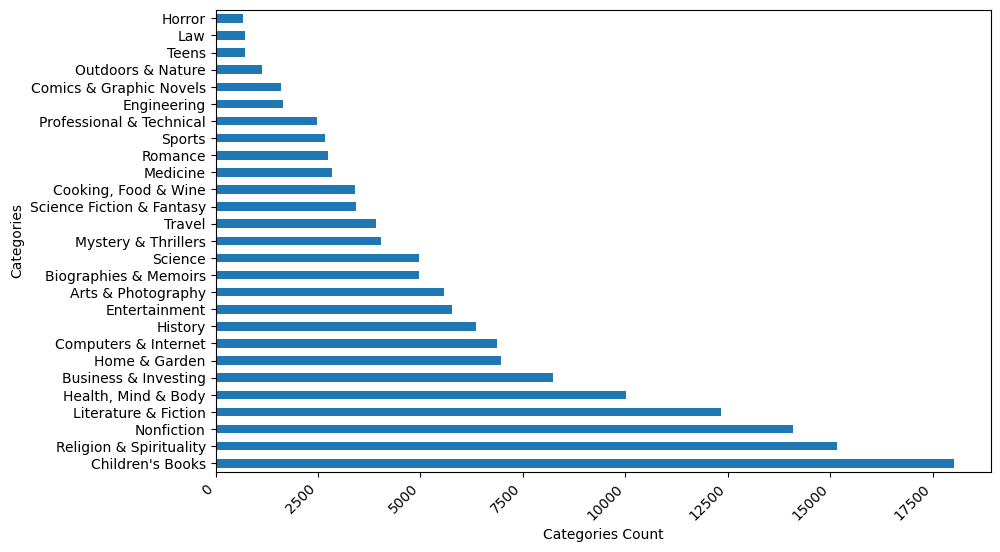

In [227]:
# Number of products per genre according to modularity class
plt_final = category_modularity_data['categories'].value_counts()
plt_final.plot(kind='barh', figsize=(10, 6))
plt.xticks(rotation=45, ha='right')
plt.ylabel('Categories')
plt.xlabel('Categories Count')
plt.show()